In [ ]:
from OpenGL.GL import *
from OpenGL.GLUT import *
from OpenGL.GLU import *

# Define the clipping window
x_min, y_min = 50, 50
x_max, y_max = 250, 250

# Define the line segment endpoints
x1, y1 = 25, 100
x2, y2 = 200, 300

# Define region codes
INSIDE = 0  # 0000
LEFT = 1    # 0001
RIGHT = 2   # 0010
BOTTOM = 4  # 0100
TOP = 8     # 1000

# Function to compute region code for a point (x, y)
def compute_region_code(x, y):
    code = INSIDE
    if x < x_min:
        code |= LEFT
    elif x > x_max:
        code |= RIGHT
    if y < y_min:
        code |= BOTTOM
    elif y > y_max:
        code |= TOP
    return code

# Function to clip the line segment using Cohen-Sutherland algorithm
def cohen_sutherland_line_clip(x1, y1, x2, y2):
    code1 = compute_region_code(x1, y1)
    code2 = compute_region_code(x2, y2)

    accept = False

    while True:
        if code1 == 0 and code2 == 0:  # Both endpoints are inside the window
            accept = True
            break
        elif code1 & code2 != 0:  # Both endpoints are outside the same region (trivially reject)
            break
        else:
            # Select one of the endpoints outside the window
            if code1 != 0:
                code_out = code1
            else:
                code_out = code2

            # Find intersection point
            if code_out & TOP:
                x = x1 + (x2 - x1) * (y_max - y1) / (y2 - y1)
                y = y_max
            elif code_out & BOTTOM:
                x = x1 + (x2 - x1) * (y_min - y1) / (y2 - y1)
                y = y_min
            elif code_out & RIGHT:
                y = y1 + (y2 - y1) * (x_max - x1) / (x2 - x1)
                x = x_max
            elif code_out & LEFT:
                y = y1 + (y2 - y1) * (x_min - x1) / (x2 - x1)
                x = x_min

            # Replace outside point with intersection point
            if code_out == code1:
                x1, y1 = x, y
                code1 = compute_region_code(x1, y1)
            else:
                x2, y2 = x, y
                code2 = compute_region_code(x2, y2)

    if accept:
        return x1, y1, x2, y2
    else:
        return None

# Function to display the OpenGL scene
def display():
    glClear(GL_COLOR_BUFFER_BIT)
    glColor3f(1.0, 1.0, 1.0)

    # Draw clipping window
    glBegin(GL_LINE_LOOP)
    glVertex2f(x_min, y_min)
    glVertex2f(x_max, y_min)
    glVertex2f(x_max, y_max)
    glVertex2f(x_min, y_max)
    glEnd()

    # Draw original line segment
    glColor3f(1.0, 0.0, 0.0)
    glBegin(GL_LINES)
    glVertex2f(x1, y1)
    glVertex2f(x2, y2)
    glEnd()

    # Clip the line segment
    clipped_line = cohen_sutherland_line_clip(x1, y1, x2, y2)
    if clipped_line:
        x1_clipped, y1_clipped, x2_clipped, y2_clipped = clipped_line
        # Draw clipped line segment
        glColor3f(0.0, 1.0, 0.0)
        glBegin(GL_LINES)
        glVertex2f(x1_clipped, y1_clipped)
        glVertex2f(x2_clipped, y2_clipped)
        glEnd()

    glFlush()

# Function to handle window resizing
def reshape(width, height):
    glViewport(0, 0, width, height)
    glMatrixMode(GL_PROJECTION)
    glLoadIdentity()
    gluOrtho2D(0.0, width, 0.0, height)
    glMatrixMode(GL_MODELVIEW)
    glLoadIdentity()

# Main function
def main():
    glutInit()
    glutInitDisplayMode(GLUT_SINGLE | GLUT_RGB)
    glutInitWindowSize(400, 400)
    glutCreateWindow(b"Cohen-Sutherland Line Clipping")
    glClearColor(0.0, 0.0, 0.0, 0.0)
    glLineWidth(2.0)
    glutDisplayFunc(display)
    glutReshapeFunc(reshape)
    glutMainLoop()

if __name__ == "__main__":
    main()


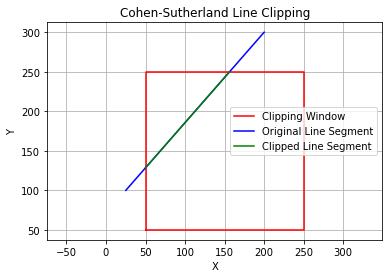

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Function to compute region code for a point (x, y)
def compute_region_code(x, y, x_min, y_min, x_max, y_max):
    code = 0
    if x < x_min:
        code |= 1  # Set LEFT bit
    elif x > x_max:
        code |= 2  # Set RIGHT bit
    if y < y_min:
        code |= 4  # Set BOTTOM bit
    elif y > y_max:
        code |= 8  # Set TOP bit
    return code

# Function to clip the line segment using Cohen-Sutherland algorithm
def cohen_sutherland_line_clip(x1, y1, x2, y2, x_min, y_min, x_max, y_max):
    accept = False
    code1 = compute_region_code(x1, y1, x_min, y_min, x_max, y_max)
    code2 = compute_region_code(x2, y2, x_min, y_min, x_max, y_max)

    while True:
        if not (code1 | code2):  # Trivially accept
            accept = True
            break
        elif code1 & code2:  # Trivially reject
            break
        else:
            code_out = code1 if code1 else code2
            x, y = 0, 0

            if code_out & 1:  # Left
                x = x_min
                y = y1 + (y2 - y1) * (x - x1) / (x2 - x1)
            elif code_out & 2:  # Right
                x = x_max
                y = y1 + (y2 - y1) * (x - x1) / (x2 - x1)
            elif code_out & 4:  # Bottom
                y = y_min
                x = x1 + (x2 - x1) * (y - y1) / (y2 - y1)
            elif code_out & 8:  # Top
                y = y_max
                x = x1 + (x2 - x1) * (y - y1) / (y2 - y1)

            if code_out == code1:
                x1, y1 = x, y
                code1 = compute_region_code(x1, y1, x_min, y_min, x_max, y_max)
            else:
                x2, y2 = x, y
                code2 = compute_region_code(x2, y2, x_min, y_min, x_max, y_max)

    return accept, x1, y1, x2, y2

# Main function
def main():
    # Define coordinates of the clipping window
    x_min, y_min = 50, 50
    x_max, y_max = 250, 250

    # Define coordinates of the line segment
    x1, y1 = 25, 100
    x2, y2 = 200, 300

    # Clip the line segment
    accept, x1_clipped, y1_clipped, x2_clipped, y2_clipped = cohen_sutherland_line_clip(x1, y1, x2, y2, x_min, y_min, x_max, y_max)

    # Plot the clipping window
    plt.plot([x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], 'r-', label='Clipping Window')

    # Plot the original line segment
    plt.plot([x1, x2], [y1, y2], 'b-', label='Original Line Segment')

    if accept:
        # Plot the clipped line segment
        plt.plot([x1_clipped, x2_clipped], [y1_clipped, y2_clipped], 'g-', label='Clipped Line Segment')
    else:
        print("Line segment lies outside the clipping window and has been discarded.")

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Cohen-Sutherland Line Clipping')
    plt.legend()
    plt.grid(True)
    plt.axis('equal')
    plt.show()

if __name__ == "__main__":
    main()
